<a href="https://colab.research.google.com/github/Janaalsh5/Heart-Disease/blob/main/Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- Problem

Heart disease is one of the most common and life-threatening conditions worldwide, causing millions of deaths each year. The major challenge is that many people develop serious heart problems before they are even aware of their risk. Traditional medical check-ups may not always detect early warning signs, making prevention and early detection extremely important.

In this project, we aim to solve the problem of identifying individuals who are at high risk of heart disease using data analysis and machine learning. By analyzing key health indicators such as age, blood pressure, cholesterol, and blood sugar levels, we can build a predictive model that classifies whether a person is likely to develop heart disease. This can help healthcare providers take early action and guide patients toward healthier lifestyles or medical treatments before the disease becomes severe.

We believe this problem is important because early detection can save lives. Predicting heart disease risk using data not only supports better medical decisions but also helps reduce healthcare costs, prevent hospitalizations, and improve overall public health. Addressing this issue through technology can contribute to a healthier and more sustainable society.

# 2- Data Mining Task

This study applies two essential data mining approaches classification and clustering to evaluate and understand the risk of heart disease. The classification technique focuses on building a predictive model that determines whether a patient is likely to have heart disease based on various medical attributes such as age, sex, blood pressure, cholesterol levels, chest pain type, and other health indicators. The goal of this model is to accurately classify patients into two categories: those with heart disease and those without it.

On the other hand, clustering is used to group patients into meaningful clusters based on similarities in their health characteristics, without using the heart disease label. This unsupervised approach helps reveal hidden patterns, patient subgroups, and underlying risk profiles that may not be immediately visible through simple observation. By combining both classification and clustering, this study provides a deeper understanding of patient patterns and enhances the ability to identify and analyze risk factors associated with heart disease.



# 3- Data


​
The dataset used in this project was obtained from Kaggle and contains detailed medical information for 918 patients, represented through 12 attributes that include demographic factors (Age, Sex), clinical measurements (RestingBP, Cholesterol, MaxHR, Oldpeak), and categorical indicators such as ChestPainType, RestingECG, ExerciseAngina, and ST_Slope. The target variable, HeartDisease, is binary and shows a relatively balanced distribution, with 508 patients having heart disease and 410 without, making the dataset suitable for predictive modeling. Phase 1 explored the raw dataset through descriptive statistics, distribution plots, outlier detection, and class analysis, revealing issues such as 173 missing values (mostly represented as zeros) and significant outliers in features like Cholesterol, RestingBP, and FastingBS. Phase 2 focused on cleaning and preparing the data by replacing missing entries, removing noise, capping outliers using the IQR method, encoding categorical variables, normalizing numerical attributes, and discretizing Age and Oldpeak into groups. This preprocessing process ensured data consistency and improved model readiness. Overall, the dataset provides a rich and diverse set of medically relevant attributes, making it highly suitable for both classification and clustering techniques for heart disease prediction.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest, f_classif
import pickle

df = pd.read_csv('/content/Raw_dataset.csv')

data = pd.read_csv('/content/Raw_dataset.csv')
num_attributes = data.shape[1]
num_object = data.shape[0]
attribute_types = data.dtypes.to_frame( name = 'Data Types')
class_name = data.columns[-1]
class_label = data.columns[-1]

print(f"\033[1mGeneral iformation:\n")
print(f"\033[1mNumber of attributes:\033[0m {num_attributes}\n")
print(f"\033[1mNumber of objects:\033[0m {num_object}\n")
print(f"\033[1mClass lable:\033[0m {class_label}\n")
print(f"\033[1mAttribute types:\033[0m")
print(attribute_types)
import seaborn as sns
import matplotlib.pyplot as plt

# Load the original dataset (before preprocessing)
df = pd.read_csv("/content/Raw_dataset.csv")

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (7,4)

# 1) Show first few rows of the dataset
print("Dataset Preview:")
display(df.head())

# 2) Structure of dataset: rows, columns, types
print("\nDataset Info:")
print(df.info())


General iformation:

Number of attributes: 12

Number of objects: 918

Class lable: HeartDisease

Attribute types:
               Data Types
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
Dataset Preview:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


# 4- Data Preprocessing


To prepare the dataset for effective modeling, several preprocessing steps were applied based on the issues identified in Phase 2. First, missing values were detected—primarily in Cholesterol and RestingBP—and were replaced with the mean of their respective columns to maintain data consistency. Next, outliers in numerical features such as RestingBP, Cholesterol, MaxHR, and Oldpeak were identified using the IQR method and handled by capping them within the acceptable range to reduce skewness without removing data. The dataset was then checked for duplicate rows, and none were found. Categorical attributes including Sex, ChestPainType, RestingECG, ST_Slope, and ExerciseAngina were transformed into numerical values using label encoding to make them suitable for machine-learning algorithms. Numerical variables (Age, RestingBP, Cholesterol, MaxHR, Oldpeak) were standardized using z-score normalization to ensure equal contribution during model training. Noise removal was performed by replacing unrealistic zero values in RestingBP and Cholesterol with the median of valid entries. Finally, discretization was applied to Age and Oldpeak, converting them into meaningful categorical groups (e.g., Young/Middle/Old), which helps improve interpretability and supports certain models. These preprocessing tasks ensured that the dataset was clean, consistent, and fully ready for classification and clustering analysis.



Data After Preprocessing:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289.0,0,1,172,0,0.0,2,0
1,49,0,2,160,180.0,0,1,156,0,1.0,1,1
2,37,1,1,130,283.0,0,2,98,0,0.0,2,0
3,48,0,0,138,214.0,0,1,108,1,1.5,1,1
4,54,1,2,150,195.0,0,1,122,0,0.0,2,0



Summary Statistics:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.125272,203.985158,0.233115,0.989107,136.819172,0.404139,0.877778,1.361656,0.553377
std,9.432617,0.407701,0.956519,16.993314,95.922341,0.423046,0.631671,25.432057,0.490992,1.031693,0.607056,0.497414
min,28.000000,0.000000,0.000000,90.000000,32.625000,0.000000,0.000000,66.000000,0.000000,-2.250000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,407.625000,1.000000,2.000000,202.000000,1.000000,3.750000,2.000000,1.000000


/tmp/ipython-input-2148957057.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="HeartDisease", data=df, palette="coolwarm")


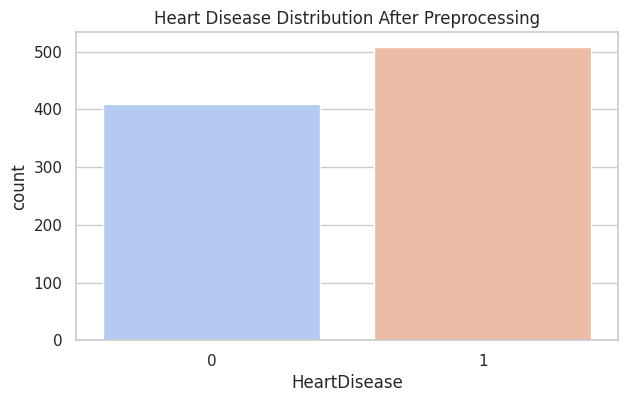

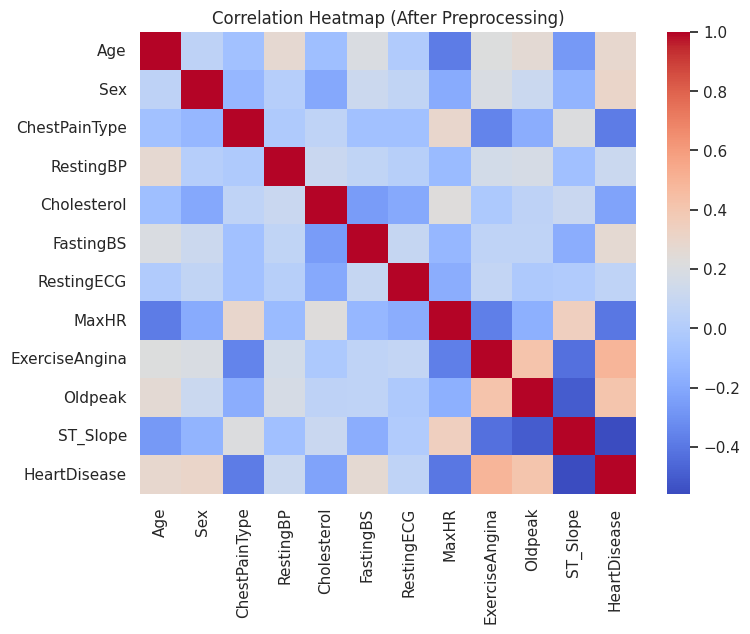

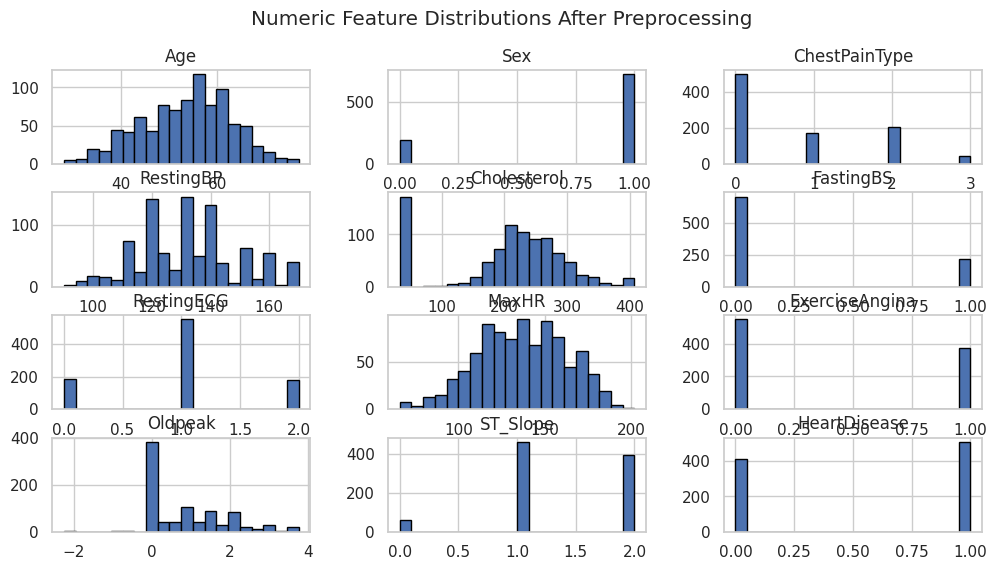

In [5]:

import seaborn as sns
import matplotlib.pyplot as plt

# Load final preprocessed dataset
df = pd.read_csv("/content/Prerocced1_data.csv")   # Change file name if needed

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (7,4)

# 1) Preview of cleaned dataset
print("Data After Preprocessing:")
display(df.head())

# 2) Summary statistics
print("\nSummary Statistics:")
display(df.describe())

# 3) Target variable distribution
plt.figure()
sns.countplot(x="HeartDisease", data=df, palette="coolwarm")
plt.title("Heart Disease Distribution After Preprocessing")
plt.show()

# 4) Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (After Preprocessing)")
plt.show()

# 5) Histograms of final numeric features
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

df[numeric_cols].hist(bins=20, figsize=(12,6), edgecolor='black')
plt.suptitle("Numeric Feature Distributions After Preprocessing")
plt.show()


# 5- Data Mining Technique


dsd

# 6- Evaluation and Comparison


sd

# 7- Findings

dasd